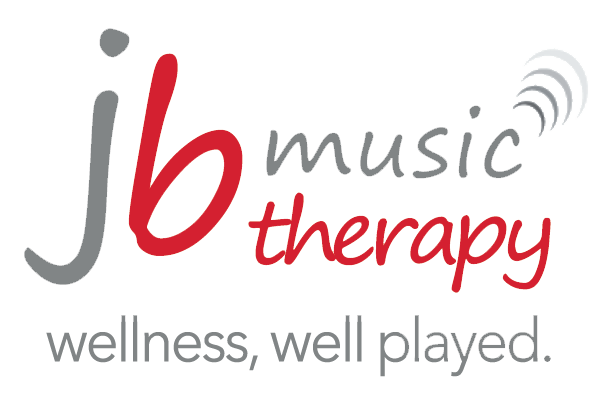

# Introduction

This reports gives you in-depth insights about a survey that was conducted by **JB Music Therapy**. JB Music Therapy is a team of Certified Music Therapists who specializes in designing personalized music therapy experiences for clients with the goal of fostering positive change, including boosting mood, decreasing stress, strengthening relationships, increasing focus, promoting learning, reducing anxiety, aiding recovery after injury, and restoring lost memories. JB Music Therapy is the largest employer of Music Therapists in **Canada**. They conducted a survey to assess the impact of music on people's mental health and mood in general.

# Data Preprocessing
Let us examine the data contained within the survey.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgn
import datetime

In [2]:
# load the csv file
music_and_therapy_survey = pd.read_csv("Music-and-Therapy-survey-1.csv")

# printig first few rows
music_and_therapy_survey.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


The survey data contains information on a variety of topics, including the respondent's age, music listening habits, mental health, and more. There are a total of **736 entries** in the dataset, each with **33 columns** that provide valuable insights into the survey participants. The columns include in the dataset are shown below.

In [3]:
# getting information about the columns of the dataset
music_and_therapy_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

Each column is represented by a specific data type, with float64 used for 7 columns and object used for 26 columns. The non-null count for each column is also noted, with most columns having 736 non-null values, and some columns having slightly lower non-null counts as described in the previous summary. 

# Data Cleaning

The following is a summary of the null value counts for each column in the survey data.

In [4]:
music_and_therapy_survey.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

This information is relevant for understanding the completeness of the data, and any necessary steps for data cleaning or imputation. The column with the largest number of null values is _"BPM"_ with **107 missing values**, while several other columns have a smaller number of missing values. You can clearly observe this information from below visualization.

<AxesSubplot:>

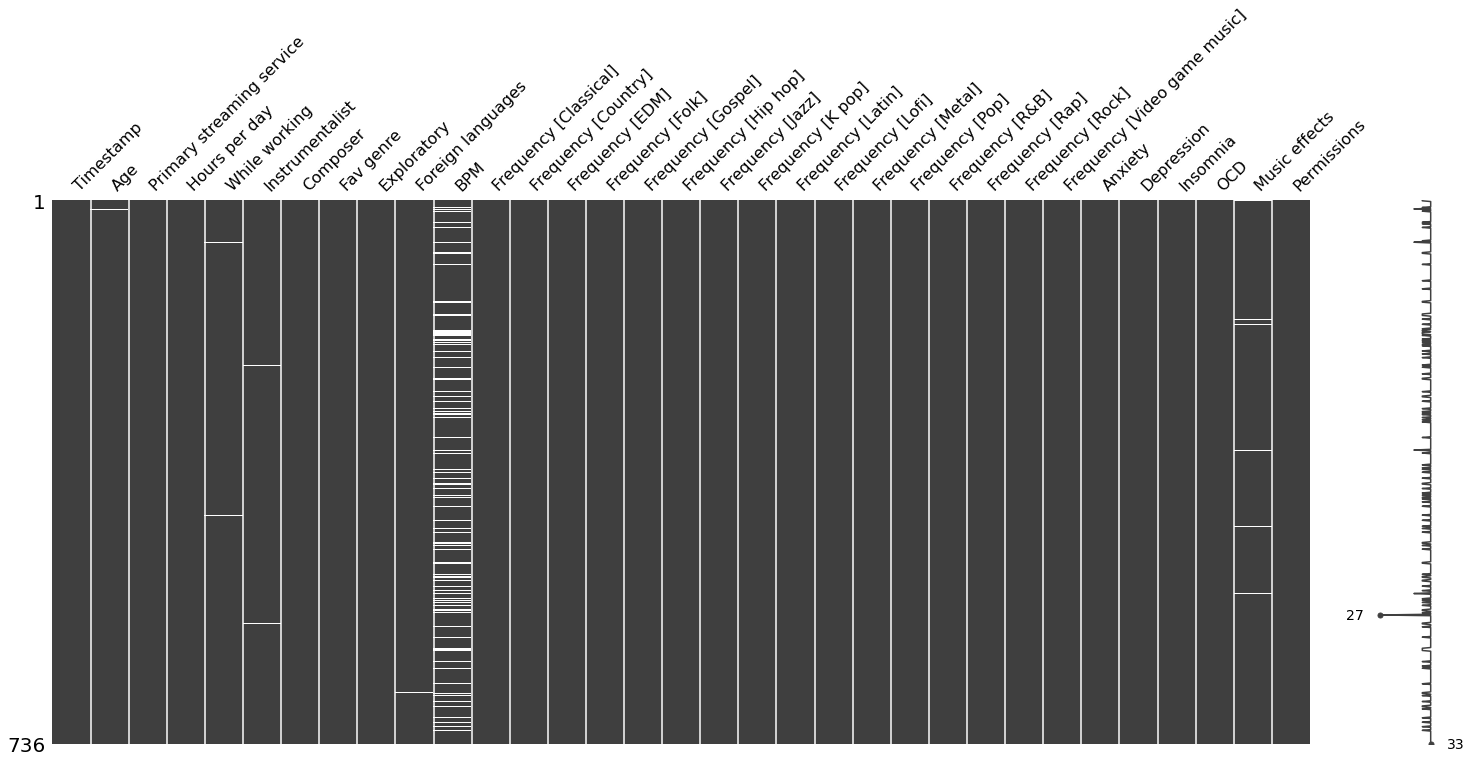

In [5]:
#visualize missing values
msgn.matrix(music_and_therapy_survey)

The column 'BPM' has the highest number of missing values among all columns. To ensure a thorough analysis, the missing values will be addressed either through dropping a portion of the entries or using an appropriate imputation method.

<AxesSubplot:>

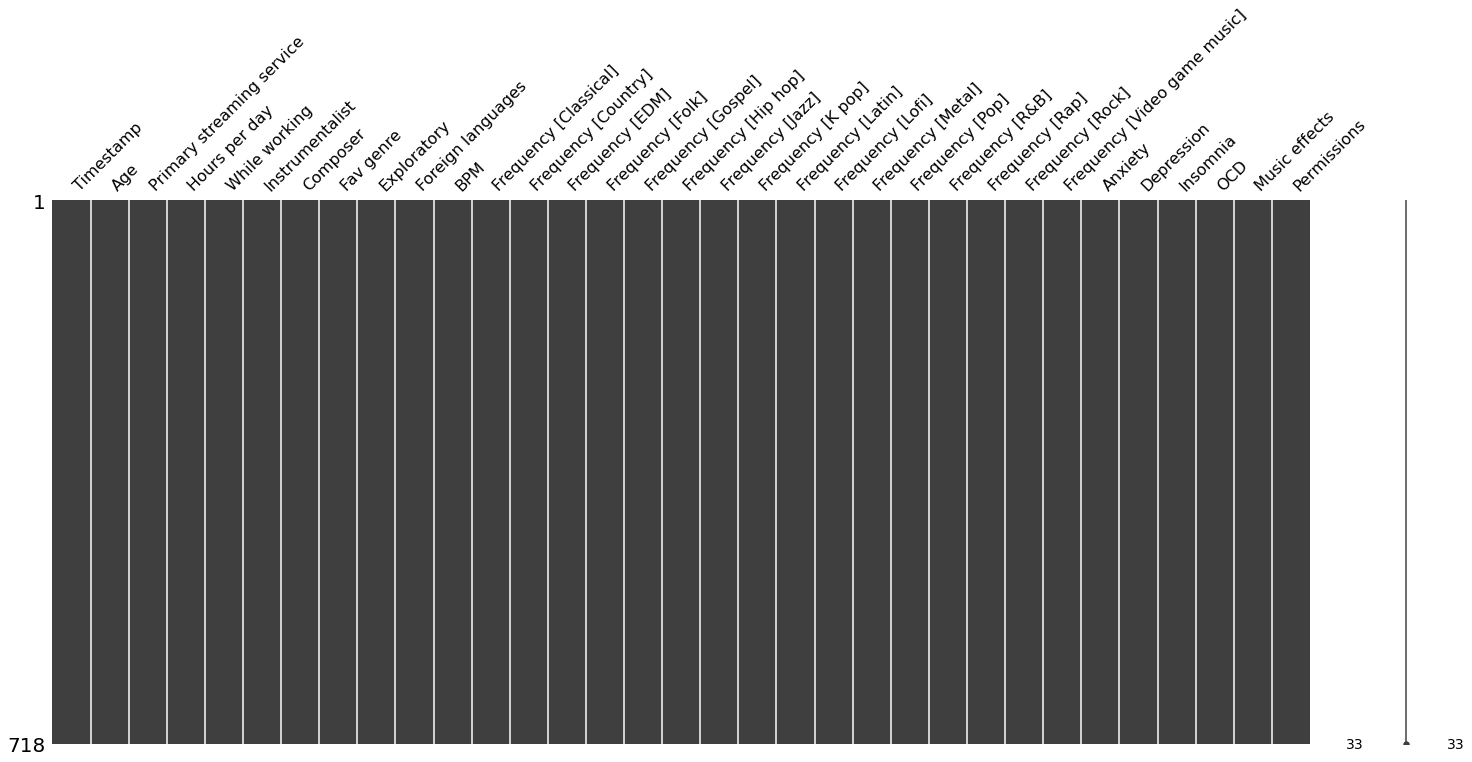

In [6]:
# handling missing values
music_and_therapy_survey['BPM'] = music_and_therapy_survey['BPM'].fillna(method='bfill')
music_and_therapy_survey_filtered = music_and_therapy_survey.dropna()

msgn.matrix(music_and_therapy_survey_filtered)

Through dropping some entries and using imputation techniques, we were able to complete the data, resulting in a final sample size of **718 entries** with no missing values. Additionally, we converted the datatype of the _"Timestamp"_ column from **object** to **datetime** format, which allows us to extract date information for further analysis.

In [7]:
#converting timestamp datatype from object to datetime
music_and_therapy_survey_filtered['Timestamp'] = pd.to_datetime(music_and_therapy_survey_filtered['Timestamp'], infer_datetime_format=True)
music_and_therapy_survey_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 2 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     718 non-null    datetime64[ns]
 1   Age                           718 non-null    float64       
 2   Primary streaming service     718 non-null    object        
 3   Hours per day                 718 non-null    float64       
 4   While working                 718 non-null    object        
 5   Instrumentalist               718 non-null    object        
 6   Composer                      718 non-null    object        
 7   Fav genre                     718 non-null    object        
 8   Exploratory                   718 non-null    object        
 9   Foreign languages             718 non-null    object        
 10  BPM                           718 non-null    float64       
 11  Frequency [Classical]         71

C:\Users\The Great Faizan\AppData\Local\Temp\ipykernel_2044\1459607443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_and_therapy_survey_filtered['Timestamp'] = pd.to_datetime(music_and_therapy_survey_filtered['Timestamp'], infer_datetime_format=True)


# Exploring the Data 
## _A Deep Dive into the Analysis and Visualization of the Survey Results_

### Age Distribution of Respondents

After analyzing the _'Age'_ column of the survey data, it was found that the majority of the respondents were between **the ages of 18 to 21 with 81 and 60 respondents**, respectively. The ages ranged from 18 to 89, and the oldest respondent being 89 years old. The distribution of the ages was visually represented using a histogram, which shows that most of the respondents were between the ages of 15 to 25.

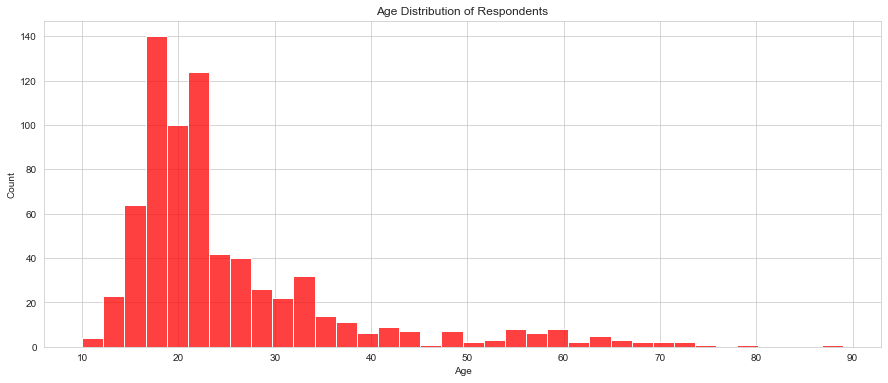

In [8]:
# getting the number of counts of age
age_count = music_and_therapy_survey_filtered.groupby('Age')['Age'].count().sort_values(ascending=False)

#visualizing age counts by histogram
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.histplot(data=music_and_therapy_survey_filtered['Age'], color='red')
plt.title("Age Distribution of Respondents")
plt.show()

### Popularity of Streaming Services Among Survey Participants

Out of the total 718 participants, **450 participants** use **Spotify** as their primary streaming service. On the other hand, **90 participants** use **YouTube Music**, **69 participants do not use any streaming service**, **50 participants** use **Apple Music** and **49 participants** use **other streaming services**. The least number of participants, **10,** use **Pandora** as their primary streaming service. The histogram visually represents the data and helps to understand the distribution of the data.

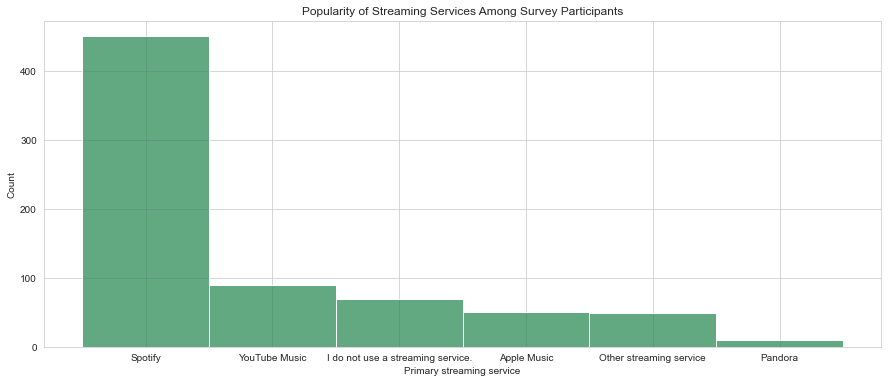

In [9]:
# getting the number of counts of streaming services
streaming_service_count = music_and_therapy_survey_filtered.groupby('Primary streaming service')['Primary streaming service'].count().sort_values(ascending=False)

#visualizing streaming service count by histogram
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.histplot(data=music_and_therapy_survey_filtered['Primary streaming service'], color='seagreen')
plt.title("Popularity of Streaming Services Among Survey Participants")
plt.show()

### Daily Music Listening Hours Habit

The data reveals that the majority of participants listen to music for **2 hours per day**, with **170 people** reporting this amount of time. The second most popular response is **1 hour per day**, with **115 people** reporting this amount. The data continues to decrease as the number of hours per day increases, with the least common response being 20 hours per day, with only 1 person reporting this amount. The barplot provides a visual representation, allowing us for a clearer understanding of music listening habits among the participants.

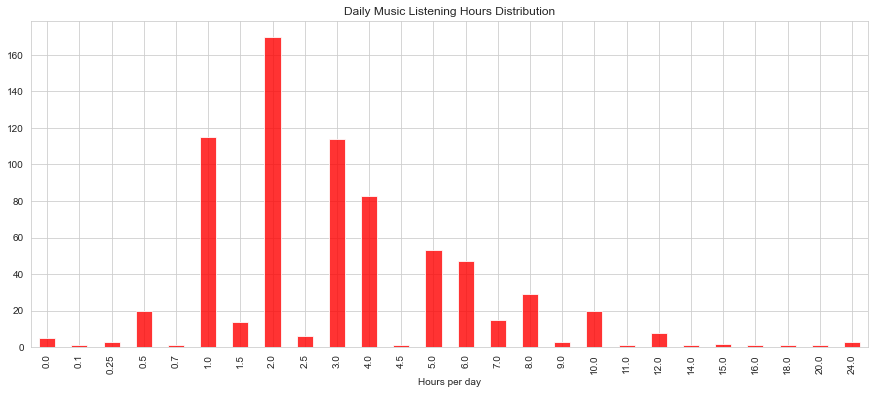

In [10]:
# getting the hours count
hours_count = music_and_therapy_survey_filtered.groupby('Hours per day')['Hours per day'].count()

#visualizing hours per day using barplot
hours_count.plot(kind='bar', color='red', figsize=(15,6), title="Daily Music Listening Hours Distribution", alpha=0.8)
plt.show()

### Music Listening Habits while Working

The data shows that **567 participants** said that they **listen to music while working**, whereas **151 participants** said that they **do not listen to music while working**. The bar chart provides a visual representation of responses, with a clear majority of participants indicating that they listen to music while working.

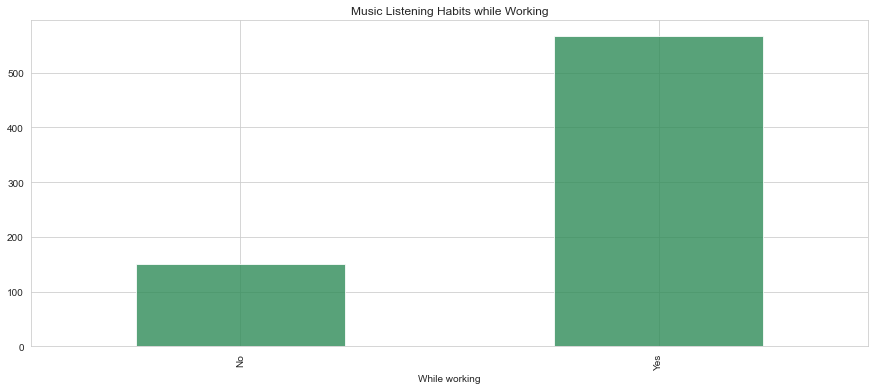

In [11]:
# getting the number of participants who listen music while working
while_working_count = music_and_therapy_survey_filtered.groupby('While working')['While working'].count()

# visualizing the number of participants who listen music while working using barplot
while_working_count.plot(kind='bar', color='seagreen', figsize=(15,6), title="Music Listening Habits while Working", alpha=0.8)
plt.show()

### Participants as Instrumentalists

The data represents the response of the survey participants on whether they are instrumentalists or not. Out of the total participants, **489** stated that they are **not instrumentalists** while **229 participants** claimed that they are **instrumentalists**. A barplot can be plotted to show the responses and give a visual representation of the data. This information can be useful in understanding the musical background of the survey participants and how it may relate to their music listening habits and mental health.

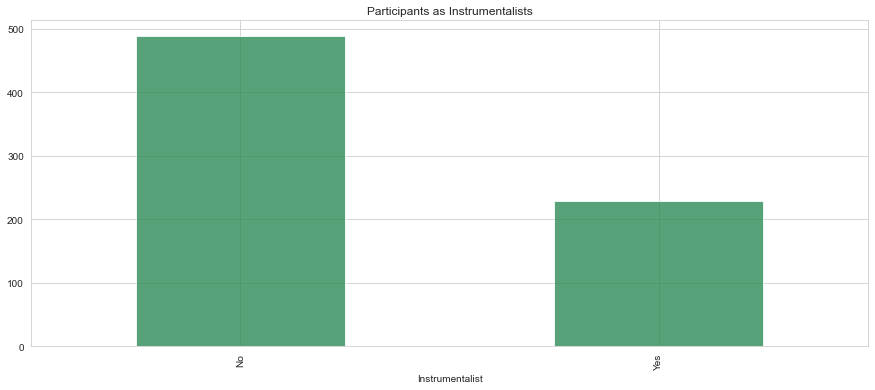

In [12]:
# getting the number of participants who are instumentalist
instrumentalist_count = music_and_therapy_survey_filtered.groupby('Instrumentalist')['Instrumentalist'].count()

#visualizing instrumentalists using barplot
instrumentalist_count.plot(kind='bar', color='seagreen', figsize=(15,6), title="Participants as Instrumentalists", alpha=0.8)
plt.show()

### Music Composer Habits among Respondents

The data shows that out of 718 participants, **594 individuals responded "No"** to being a composer, while **124 individuals responded "Yes"**. The barplot provides a visual representation allowing us to quickly see the relative proportion of participants who are composers versus those who are not.

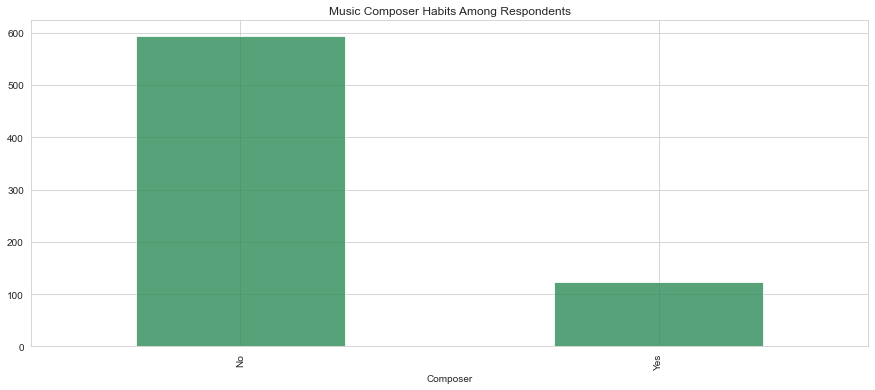

In [13]:
# getting the number of participants who are composer
composer_count = music_and_therapy_survey_filtered.groupby('Composer')['Composer'].count()

# visualizing the number of participants who are composer using barplot
composer_count.plot(kind='bar', color='seagreen', figsize=(15,6), title="Music Composer Habits Among Respondents", alpha=0.8)
plt.show()

### Favourite Music Genre among Participants

The data provides a breakdown of the favorite music genres among the survey participants. The results show that **Rock** is the most popular genre with **184 participants**, followed by **Pop** with **114 participants**, and **Metal with 87** participants. Other genres, including **Classical, Video Game Music, EDM, R&B, Hip Hop, Folk, Country, Rap, K Pop, Jazz, Lofi, Gospel, and Latin** are also represented among the participants, with varying levels of popularity. A barplot was also plotted to illustrate the participant's favorite music genres. The data gives insights into the diverse music tastes of the survey participants and can be useful in understanding the demand for different types of music.

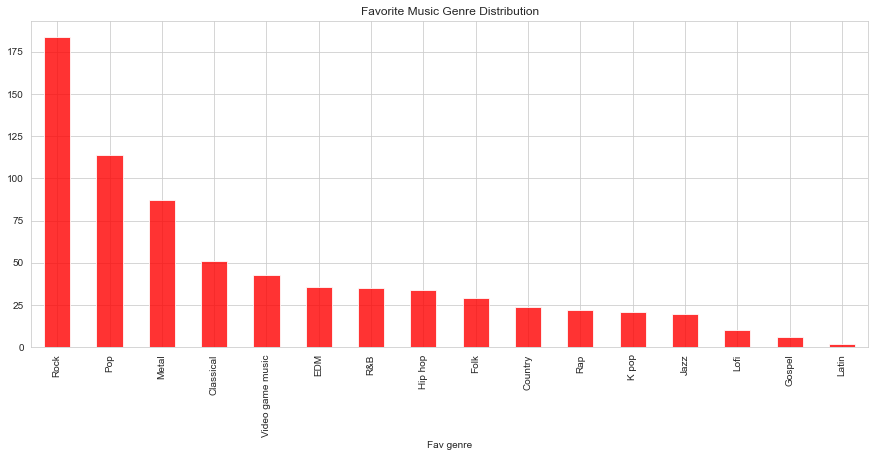

In [14]:
# getting the number counts of different genre
fav_genre_count = music_and_therapy_survey_filtered.groupby('Fav genre')['Fav genre'].count().sort_values(ascending=False)

# visualizing the count of favourite genre by histogram
fav_genre_count.plot(kind='bar', color='red', figsize=(15,6), title="Favorite Music Genre Distribution", alpha=0.8)
plt.show()

### Exploratory Music Listening Habits

The data represents the responses of participants regarding their music listening habits being exploratory or not. Of the 718 participants, **514** consider themselves to be **exploratory**, while **204 do not**.

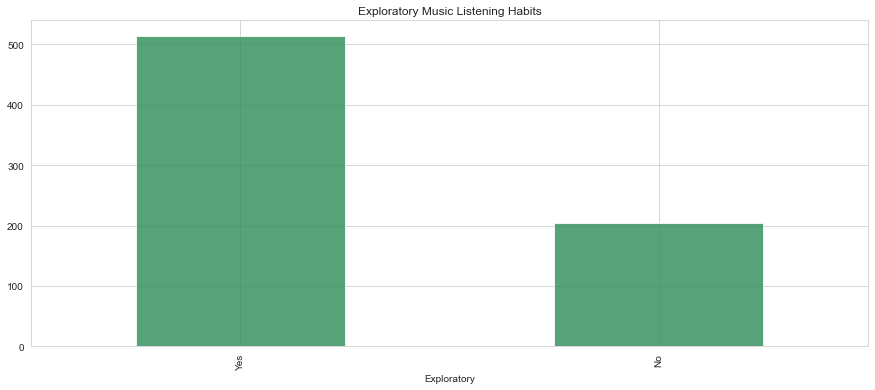

In [15]:
# getting the number counts of exploratory
exploratory_count = music_and_therapy_survey_filtered.groupby('Exploratory')['Exploratory'].count().sort_values(ascending=False)

# visualize the number of exploratory count using barplot
exploratory_count.plot(kind='bar', color='seagreen', figsize=(15,6), title="Exploratory Music Listening Habits", alpha=0.8)
plt.show()

### Participant's Knowledge of Foreign Language

The data shows the response from participants on their knowledge of foreign languages. Out of 718 participants, **395 responded** that **they know a foreign language** while **323 responded** that **they do not**. The data indicates that just over half of the participants are proficient in a foreign language. This information can be represented in a bar chart for visual representation of responses.

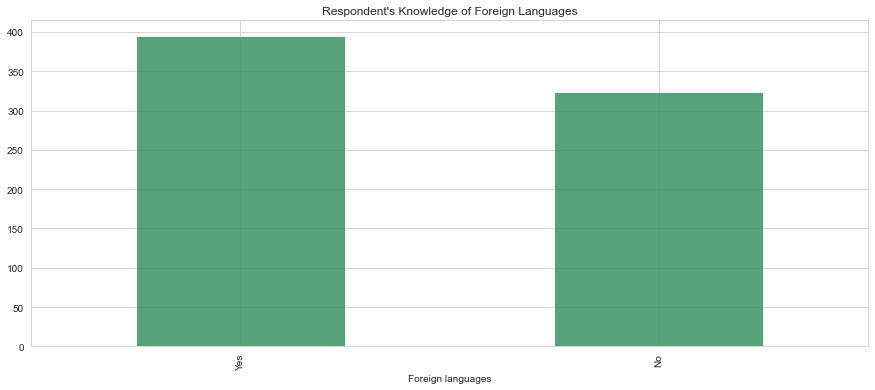

In [16]:
# getting the number counts of foreign languages
foreign_language_count = music_and_therapy_survey_filtered.groupby('Foreign languages')['Foreign languages'].count().sort_values(ascending=False)

# visualizing the number of counts of foreign language using barplot
foreign_language_count.plot(kind='bar', color='seagreen', figsize=(15,6), title="Respondent's Knowledge of Foreign Languages", alpha=0.8)
plt.show()

### Anxiety Levels among Participants

The data presents the response of participants regarding their level of anxiety. The scale ranges from 0 to 10, with 10 being the highest level of anxiety. Out of 718 participants, the highest number **119 reported a level of anxiety 7.0**, followed by **113 participants reporting a level of anxiety 8.0**. The lowest level of anxiety reported was 0, by 34 participants. This information can be visually represented using a bar plot to better understand the distribution of the participants' anxiety levels.

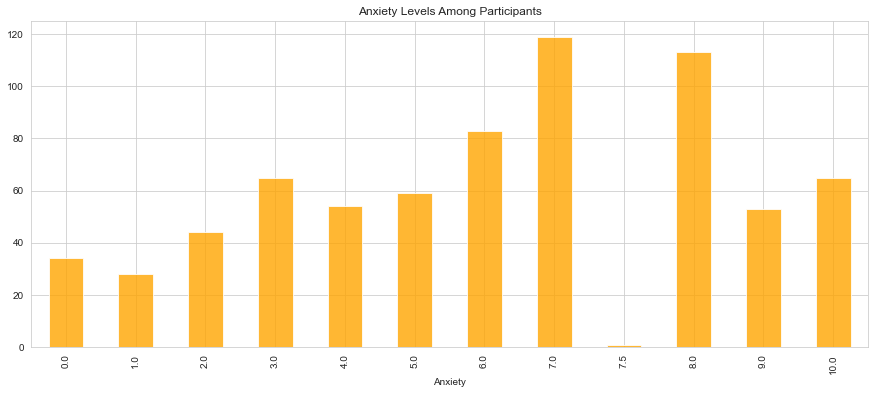

In [17]:
# getting the number counts of anxiety
anxiety_count = music_and_therapy_survey_filtered.groupby('Anxiety')['Anxiety'].count()

#visualizing number counts of anxiety using barplot
anxiety_count.plot(kind='bar', color='orange', figsize=(15,6), title="Anxiety Levels Among Participants", alpha=0.8)
plt.show()

### Depression Levels among Participants

The data also represents the levels of depression among participants on a scale of 0 to 10. The highest number of **94 reported a depression level of 7.0**, while the lowest number of **2 reported a depression level of 3.5**. The barplot visualizes the distribution of responses, allowing for an easier understanding of the distribution of depression levels among the participants.It shows that the majority of participants reported moderate levels of depression.

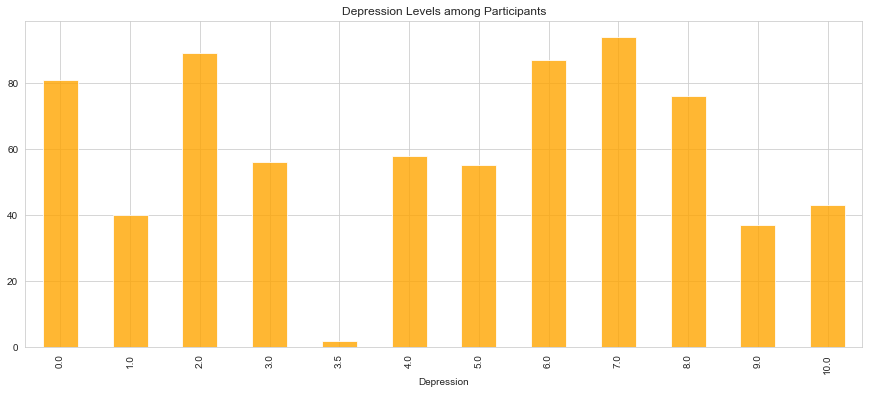

In [18]:
# getting the number counts of depression among participants
depression_count = music_and_therapy_survey_filtered.groupby('Depression')['Depression'].count()

#visualizing the number counts of depression using barplot
depression_count.plot(kind='bar', color='orange', figsize=(15,6), title="Depression Levels among Participants", alpha=0.8)
plt.show()

### Insomnia Levels among Participants

The data also shows the level of insomnia experienced by participants based on a scale of 0 to 10. Out of 718 participants, **148 reported no insomnia**, **80 reported having a low level of insomnia**. The levels of insomnia go on to increase as the numbers on the scale go up. This information can be represented in a bar plot for visual representation of the responses. A notable observation is that a significant number of participants reported experiencing no insomnia. On the other hand, a smaller number of participants reported having a high level of insomnia. This indicates that while a significant portion of participants enjoy good sleep, a non-negligible number still struggle with insomnia.

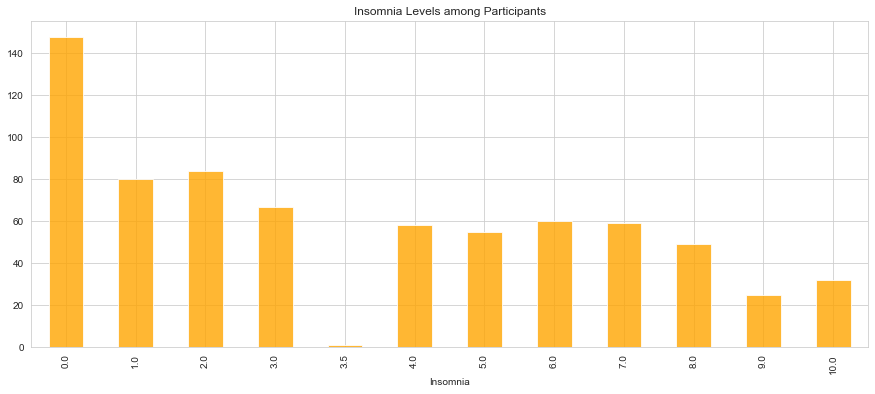

In [19]:
#getting the number counts of insomnia among participants
insomnia_count = music_and_therapy_survey_filtered.groupby('Insomnia')['Insomnia'].count()

#visualizing the number counts of insomnia using barplot
insomnia_count.plot(kind='bar', color='orange', figsize=(15,6), title='Insomnia Levels among Participants', alpha=0.8)
plt.show()

### OCD Levels among Participants

The data reflects the response from participants regarding their experience with OCD. Out of 718 participants, the highest number of participants **242 responded that they have no experience with OCD** while **93 responded that they have a minimal experience**. The barplot visualizes the distribution of responses and helps in understanding the pattern of experiences with OCD among the participants. It is noteworthy that the number of participants with minimal or moderate experience with OCD is relatively low compared to those with no experience, indicating that OCD might not be a commonly faced issue among the population.

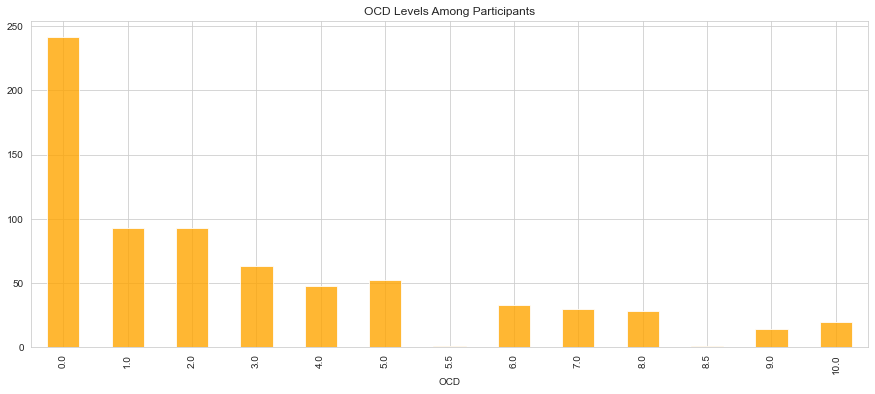

In [20]:
#getting the number counts of ocd among participants
ocd_count = music_and_therapy_survey_filtered.groupby('OCD')['OCD'].count()

#visualizing the number counts of ocd using barplot
ocd_count.plot(kind='bar', color='orange', figsize=(15,6), title="OCD Levels Among Participants", alpha=0.8)
plt.show()

### Music Effects in Participants

The data represents the response of participants on the effect of music on their mood. Out of 718 participants, **535 responded that music improves their mood, 166 responded that it has no effect and 17 participants responded that it worsens their mood**. This information can be represented in a histogram to visually represent the distribution of responses. It can be observed that a majority of the participants believe that music has a positive effect on their mood. A small percentage of the participants reported that music worsens their mood.

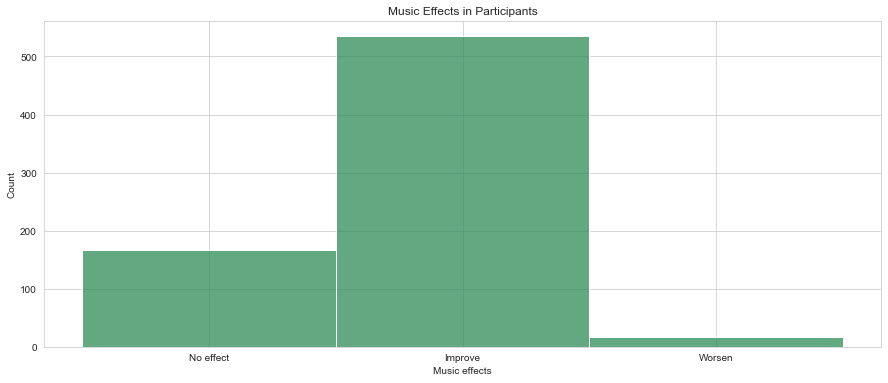

In [21]:
#getting the number counts of music effects
music_effects_count = music_and_therapy_survey_filtered.groupby('Music effects')['Music effects'].count()

#visualizing the number counts of music effects using histogram
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.histplot(data=music_and_therapy_survey_filtered['Music effects'], color='seagreen')
plt.title("Music Effects in Participants")
plt.show()

### Participant's Interest in Music Genres

The data contains responses from respondents about their listening habits for 16 different genres of music. The respondents were asked to indicate whether they never listen, rarely listen, sometimes listen, or very frequently listen to each genre. To visualize the interests of respondents in each genre, a heatmap was created using the responses. The heatmap represents the levels of listening frequency on a scale from 0 to 3, where 0 represents _"never"_, 1 represents _"rarely",_ 2 represents _"sometimes"_, and 3 represents _"very frequently"_. The heatmap provides a clear and concise representation of the respondents' listening habits and interests in different music genres.

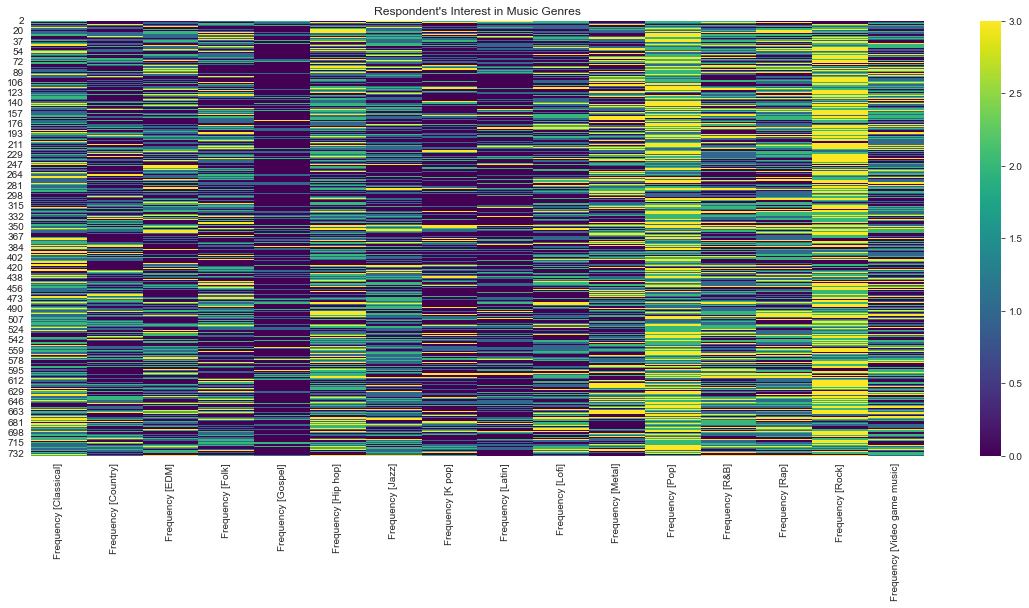

In [47]:
#extracting all frequency columns
frequencies = music_and_therapy_survey_filtered.iloc[:,11:27]

#mapping values from string to integer
frequencies.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'], [0,1,2,3], inplace=True)

#visualizing frequency response of all genres using heatmap
plt.figure(figsize=(20,8))
sns.heatmap(data=frequencies, cmap='viridis')
plt.title("Respondent's Interest in Music Genres")
plt.show()

Each cell in the heatmap represents a value on the frequency scale, with the color representing the intensity of the frequency. The color scale indicating the frequency of listening to that genre of music, with darker shades indicating a higher frequency of never listening. The heatmap shows that **Gospel** has the darkest shade, indicating that most respondents have never listened to it. Also, **K Pop** and **Latin** have a relatively darker shade, indicating that these genres are less frequently listened to by the respondents. On the other hand, **Pop** and **Rock** have a relatively high frequency of being listened to very frequently, indicated by the lighter shade in the heatmap. This data helps in understanding the popularity of different genres among the respondents and can be useful for the music industry to cater to the audience preferences.

### Relationship between Age and Favourite Music Genres

Our analysis has shown that there is a relationship between age and the respondent's favorite genre. The swarmplot of favorite genre against age reveals an interesting trend in the music preferences of respondents. It appears that respondents in the **age range of 50s to 80s have a stronger preference for the Rock genre**, compared to younger respondents who show a higher inclination towards Pop, Rock, and Metal. This finding highlights a possible relationship between age and music preference, with older respondents having a stronger preference for Rock music.

F:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


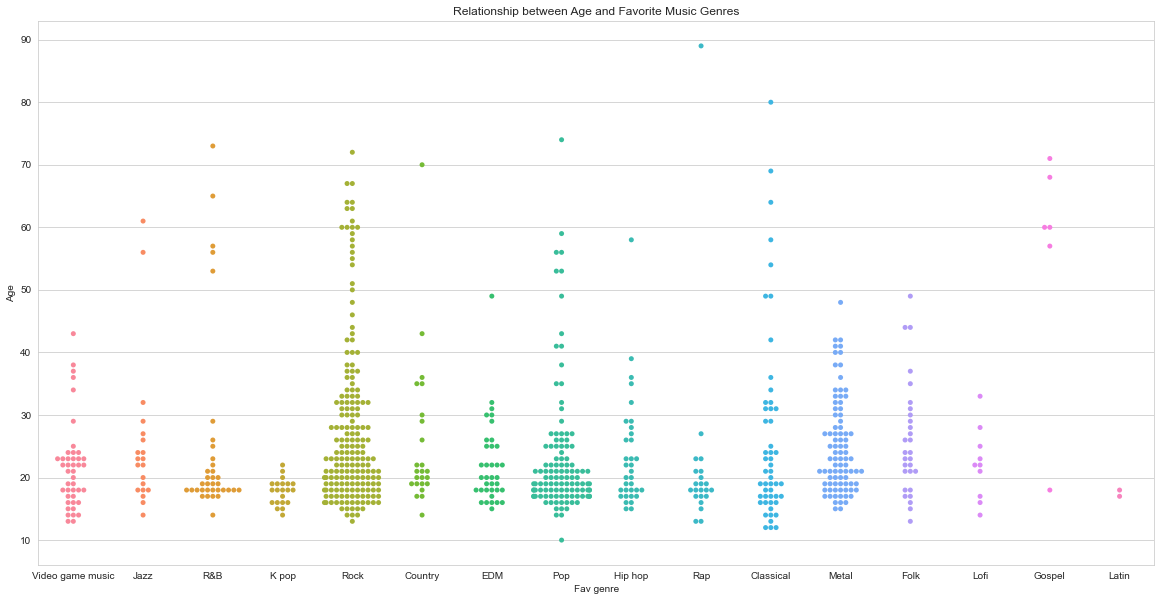

In [132]:
#visualizing relation between favourite genre and age using swarmplot
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.swarmplot(x="Fav genre", y="Age", data=music_and_therapy_survey_filtered)
plt.title("Relationship between Age and Favorite Music Genres")
plt.show()

# Conclusion

In conclusion, the survey data collected from 718 participants provides valuable insights into their music listening habits, mental health, and language proficiency.

- The majority of participants were found to be between the ages of 18 to 21 and use Spotify as their primary streaming service. 
- Most participants listen to music for 2 hours per day. 
- 78.9% participants reported listening to music while working. 
- A majority of participants considered themselves to be non-instrumentalists, with 82.72% individuals responding "No" to being a composer. 
- The most popular music genre was found to be Rock, and a majority of participants considered themselves to be exploratory in their music listening habits. 
- Just over half of the participants reported knowing a foreign language. 
- The levels of anxiety, depression, and insomnia reported among participants showed moderate levels, with the majority of participants reporting no experience with OCD. 
- The majority of participants also reported that music has a positive effect on their mood. 

These findings provide valuable information for understanding the relationship between music and mental health and can be useful in the development of future interventions to improve well-being.

# Recommendation

Based on the data analyzed from the survey, the following recommendations can be made:

- **Target audience:** The majority of the respondents were between the ages of 18 to 21. Marketers can target this age group when promoting music-related products.

- **Streaming service:** The majority of participants use Spotify as their primary streaming service, so marketers can consider partnering with Spotify to reach this group.

- **Music listening habits:** The majority of participants listen to music for 2 hours per day and listen to music while working. Marketers can take advantage of these habits by promoting products that enhance the music listening experience.

- **Musical background:** A large portion of participants are not instrumentalists and only a small number are composers. Marketers can focus on promoting products that cater to music listeners, rather than musicians.

- **Music genre preferences:** Rock is the most popular genre among participants, followed by Pop and Metal. Marketers can consider promoting products that cater to these popular genres to reach a larger audience.

- **Exploratory music habits:** The majority of participants consider themselves to be exploratory when it comes to music listening. Marketers can promote products that cater to the discovery of new music.

- **Language proficiency:** Just over half of the participants are proficient in a foreign language. Marketers can promote products that cater to the language preferences of this group.

- **Mental health:** A majority of participants reported moderate levels of depression and anxiety, and a significant number reported experiencing insomnia. Marketers can consider promoting products that aim to improve mental health, such as music therapy products or mindfulness products.

- **OCD experiences:** The majority of participants reported no experience with OCD. Marketers can promote products that aim to help with OCD, but it might not be a priority for this particular audience.

- **Music and mood:** The majority of participants reported that music improves their mood. Marketers can promote products that aim to enhance the positive effects of music on mood, such as personalized playlists or mood-based music recommendations.



><center>Thank you for taking the time to review this report. I hope this report has provided you with valuable information and insights and I am confident that the information contained within will be beneficial for making informed decisions. ~ Muhammad Faizan</center>

>email: faizanwaseem476@gmail.com, LinkedIn: https://www.linkedin.com/in/muhammad-faizan-51a892202